### 1. Data Understanding and Exploration



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
# reading the dataset
house = pd.read_csv("train.csv")

In [3]:
# summary of the dataset: 1460 rows, 81 columns
print(house.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [4]:
# head
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#### Understanding the Data Dictionary

The data dictionary contains the meaning of various attributes; some non-obvious ones are:

In [5]:
# 
# Most houses are 20, 60 and 50  MSSubclass
#which means '1-story 1946 & newer all styles' Mssublcass is sold most 
house['MSSubClass'].astype('category').value_counts()

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

In [6]:
# Below zoning info shows that Residential Low Density has been sole max no fo times.

house['MSZoning'].astype('category').value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [7]:
# Type of road access to property - Pave has the dominance here
house['Street'].astype('category').value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

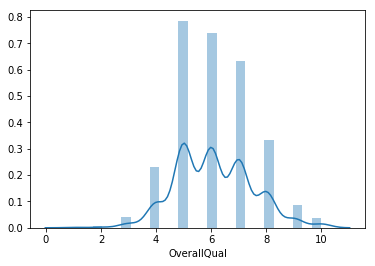

In [8]:
# Above average and avrage build houses are mostly soled
sns.distplot(house['OverallQual'])
plt.show()

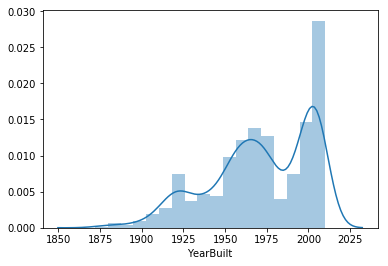

In [9]:
# Newer houses have good selling distribution
sns.distplot(house['YearBuilt'])
plt.show()

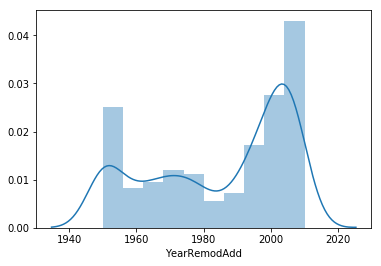

In [10]:
# latest remodelled houses are mostly sold
sns.distplot(house['YearRemodAdd'])
plt.show()

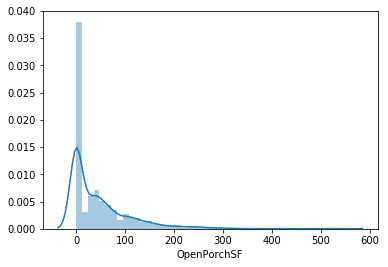

In [11]:
# withouhout open proch houses sold mostly 
sns.distplot(house['OpenPorchSF'])
plt.show()

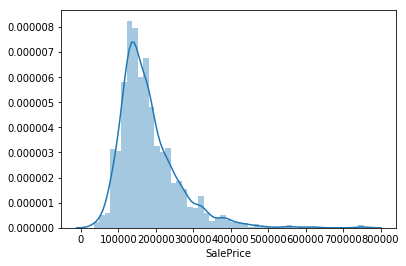

In [12]:
# target variable: price of house
sns.distplot(house['SalePrice'])
plt.show()

#### Data Exploration

To perform linear regression, the (numeric) target variable should be linearly related to *at least one another numeric variable*. Let's see whether that's true in this case.


We'll first subset the list of all (independent) numeric variables, and then make a **pairwise plot**.

In [13]:
# all numeric (float and int) variables in the dataset
house_numeric = house.select_dtypes(include=['float64', 'int64'])
house_numeric.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


we do not want 'Id'

In [14]:
# dropping  car_ID 
house_numeric = house_numeric.drop(['Id'], axis=1)
house_numeric.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


Let's now make a pairwise scatter plot and observe linear relationships.

This is quite hard to read, and we can rather plot correlations between variables. Also, a heatmap is pretty useful to visualise multiple correlations in one plot.

In [15]:
# correlation matrix
cor = house_numeric.corr()
cor

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.049900,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378


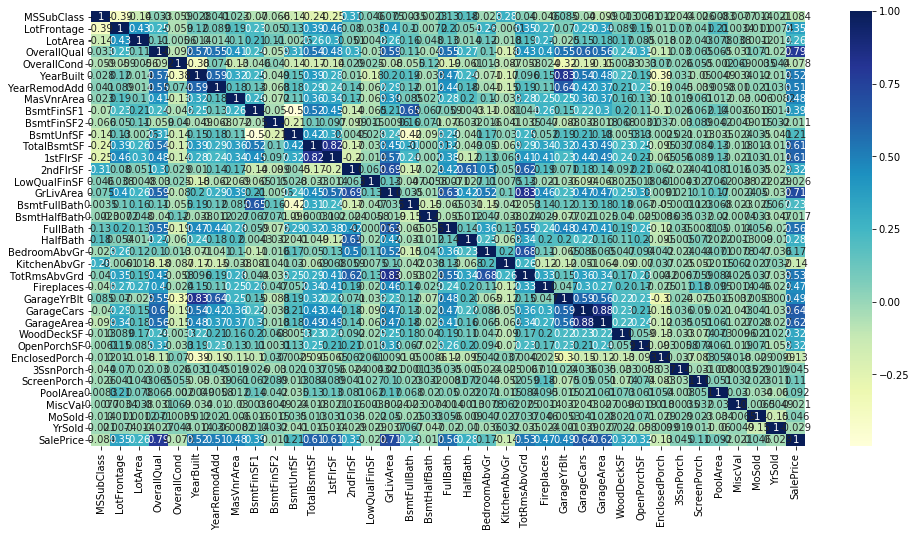

In [16]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(16,8))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()


## 2. Data Cleaning

Let's now conduct some data cleaning steps. 



In [17]:
# variable formats
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [18]:
# number of observations: 1460
house.shape

(1460, 81)

In [19]:
#  code for column-wise null count 
house.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

In [20]:
# code for row-wise null count 
house.isnull().sum(axis=1)

0        5
1        4
2        4
3        4
4        4
5        3
6        4
7        4
8        4
9        4
10       5
11       4
12       6
13       4
14       4
15       4
16       4
17       9
18       5
19       4
20       4
21       2
22       4
23       4
24       4
25       4
26       5
27       4
28       4
29       5
        ..
1430     4
1431     6
1432     4
1433     4
1434     4
1435     3
1436     4
1437     4
1438     4
1439     4
1440     4
1441     5
1442     4
1443     5
1444     5
1445     5
1446     6
1447     4
1448     4
1449    10
1450    10
1451     4
1452     5
1453    10
1454     4
1455     4
1456     3
1457     2
1458     5
1459     5
Length: 1460, dtype: int64

In [21]:
# getting null value percentage
round(100*(house.isnull().sum()/len(house.index)))

Id                 0.0
MSSubClass         0.0
MSZoning           0.0
LotFrontage       18.0
LotArea            0.0
Street             0.0
Alley             94.0
LotShape           0.0
LandContour        0.0
Utilities          0.0
LotConfig          0.0
LandSlope          0.0
Neighborhood       0.0
Condition1         0.0
Condition2         0.0
BldgType           0.0
HouseStyle         0.0
OverallQual        0.0
OverallCond        0.0
YearBuilt          0.0
YearRemodAdd       0.0
RoofStyle          0.0
RoofMatl           0.0
Exterior1st        0.0
Exterior2nd        0.0
MasVnrType         1.0
MasVnrArea         1.0
ExterQual          0.0
ExterCond          0.0
Foundation         0.0
                 ...  
BedroomAbvGr       0.0
KitchenAbvGr       0.0
KitchenQual        0.0
TotRmsAbvGrd       0.0
Functional         0.0
Fireplaces         0.0
FireplaceQu       47.0
GarageType         6.0
GarageYrBlt        6.0
GarageFinish       6.0
GarageCars         0.0
GarageArea         0.0
GarageQual 

In [22]:
#removing the columns which has more than 90% of null values. they are not of much use
house=house.drop(['PoolQC','Alley','MiscFeature','Id'], axis=1)

In [23]:
#Some of the rows might have greater than five NaN values. Such rows aren't of much use for the analysis and hence, should be removed.

house=house[house.isnull().sum(axis=1) <= 5]


In [24]:
# outliers
house.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1352.000000,1106.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1344.000000,1352.000000,1352.000000,...,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000
mean,56.020710,70.864376,10729.483728,6.224112,5.590237,1973.207840,1985.838757,110.323661,464.789201,49.409763,...,99.085059,47.924556,21.191568,3.681953,16.264053,2.979290,42.488166,6.335059,2007.805473,187025.620562
std,41.163153,24.541288,10309.553589,1.325906,1.076975,29.551253,20.276710,185.313050,459.587951,166.203822,...,127.255652,65.520138,60.758683,30.450154,57.773997,41.744468,505.435683,2.706904,1.328902,78979.296093
min,20.000000,21.000000,1300.000000,2.000000,2.000000,1880.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,35311.000000
25%,20.000000,60.000000,7750.000000,5.000000,5.000000,1956.000000,1968.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,135000.000000
50%,50.000000,70.000000,9600.000000,6.000000,5.000000,1976.000000,1995.000000,0.000000,413.000000,0.000000,...,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,169500.000000
75%,70.000000,80.000000,11767.000000,7.000000,6.000000,2002.000000,2004.000000,174.000000,735.000000,0.000000,...,172.250000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,220000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [25]:
#  code for column-wise null percentages here
round(100*(house.isnull().sum()/len(house.index)), 2)

MSSubClass        0.00
MSZoning          0.00
LotFrontage      18.20
LotArea           0.00
Street            0.00
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.59
MasVnrArea        0.59
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          0.15
BsmtCond          0.15
                 ...  
FullBath          0.00
HalfBath          0.00
BedroomAbvGr      0.00
KitchenAbvGr      0.00
KitchenQual       0.00
TotRmsAbvGrd      0.00
Functional        0.00
Fireplaces        0.00
FireplaceQu      44.08
GarageType        0.07
GarageYrBlt       0.07
GarageFinish      0.07
GarageCars 

In [26]:
# removing duplicates if any
house.drop_duplicates(inplace=True)

In [27]:
# Verifying the rows and columsn again
house.shape

(1352, 77)

In [28]:
house.columns[house.isna().any()].tolist()

['LotFrontage',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'Fence']

In [29]:
house.drop(['LotFrontage','MasVnrType','MasVnrArea','BsmtQual','BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'Fence'],axis=1,inplace=True)

## 3. Data Preparation 


#### Data Preparation

Let's now prepare the data and build the model.

In [30]:
# split into X and y
X = house.loc[:, (house.columns != 'SalePrice')]

y = house['SalePrice']


In [31]:
# creating dummy variables for categorical variables

# subset all categorical variables
house_categorical = X.select_dtypes(include=['object'])
house_categorical.head()


,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,ExterCond,Foundation,Heating,HeatingQC,CentralAir,KitchenQual,Functional,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,TA,PConc,GasA,Ex,Y,Gd,Typ,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,CBlock,GasA,Ex,Y,TA,Typ,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,TA,PConc,GasA,Ex,Y,Gd,Typ,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,TA,BrkTil,GasA,Gd,Y,Gd,Typ,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,TA,PConc,GasA,Ex,Y,Gd,Typ,Y,WD,Normal


In [32]:
# convert into dummies
house_dummies = pd.get_dummies(house_categorical, drop_first=True)
house_dummies.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [33]:
# drop categorical variables 
X = X.drop(list(house_categorical.columns), axis=1)

In [34]:
# concat dummy variables with X
X = pd.concat([X, house_dummies], axis=1)

In [35]:
X.shape

(1352, 184)

In [36]:
# scaling the features
from sklearn.preprocessing import scale

# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=184)

In [37]:
# split into train and test
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

## 3. Model Building and Evaluation

## Ridge and Lasso Regression

Let's now try predicting car prices, a dataset used in simple linear regression, to perform ridge and lasso regression.

## Ridge Regression

In [38]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.7s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [39]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.009560,0.007470,0.000631,0.000108,0.0001,{'alpha': 0.0001},-23071.466606,-23825.578720,-19462.073793,-16733.297500,...,-20450.643176,2636.439300,27,-12678.694307,-12696.193308,-13322.000537,-13624.785988,-12634.709507,-12991.276729,405.619131
1,0.003506,0.000231,0.000393,0.000015,0.001,{'alpha': 0.001},-23071.311906,-23825.218725,-19461.696832,-16733.278432,...,-20450.400789,2636.379761,26,-12678.677422,-12696.245437,-13322.020450,-13624.811974,-12634.683978,-12991.287852,405.630003
2,0.003379,0.000070,0.000389,0.000004,0.01,{'alpha': 0.01},-23069.766295,-23821.628064,-19457.938796,-16733.090223,...,-20447.983786,2635.784827,25,-12678.508700,-12696.765938,-13322.263930,-13625.071045,-12634.428914,-12991.407705,405.745853
3,0.003345,0.000041,0.000395,0.000015,0.05,{'alpha': 0.05},-23062.926413,-23805.869306,-19441.483883,-16732.305951,...,-20437.388366,2633.150713,24,-12677.761740,-12699.062008,-13323.436695,-13626.360167,-12633.300349,-12991.984192,406.321768
4,0.003405,0.000093,0.000394,0.000016,0.1,{'alpha': 0.1},-23054.443440,-23786.608831,-19421.746440,-16731.441324,...,-20424.523394,2629.858447,23,-12676.834654,-12701.981313,-13325.103843,-13628.138985,-12631.901183,-12992.791996,407.121366


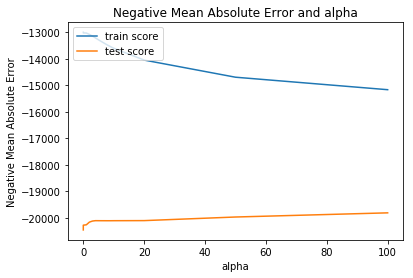

In [40]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [41]:
# From above diagram, it is clear that alpha should be 8.
alpha = 8
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-1.83094765e+03,  5.93628555e+03,  1.19663140e+04,  6.49969122e+03,
        9.19490371e+03,  6.64151352e+02,  5.42826146e+03,  1.55576175e+02,
       -2.04402641e+03,  3.92992965e+03,  8.34714779e+03,  1.13723516e+04,
       -8.20785912e+02,  1.57668200e+04,  2.66112594e+03, -2.55011299e+02,
        1.43159723e+03, -4.45890345e+02, -2.06135026e+03, -3.53841507e+03,
        3.79502654e+03,  1.85494824e+03,  4.23859207e+03,  3.96022877e+03,
        1.21500866e+03,  1.39425044e+03, -5.94904913e+02,  9.91782332e+02,
        2.87295303e+03,  3.21748248e+03,  3.57450367e+02, -9.39184418e+02,
        1.60732551e+02,  3.62003771e+03,  5.92290909e+02,  4.83615994e+03,
        5.47148444e+03,  3.71963529e+03,  1.74992850e+03, -2.16993182e+03,
        3.84734287e+02,  3.89545415e+03,  9.12096309e+02,  3.79851098e+03,
        0.00000000e+00,  1.24600201e+03, -1.56378609e+03, -1.20663773e+03,
       -5.73356600e+02,  1.97474739e+03, -6.95389914e+02, -8.62296389e+01,
        4.53163920e+02, -

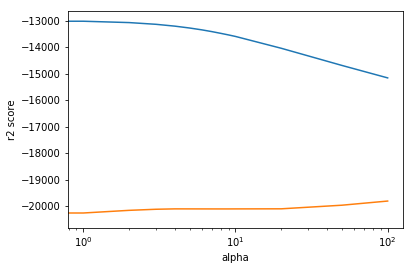

In [42]:
# plot for r2 score
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2 score')
plt.xscale('log')
plt.show()

In [43]:
# lasso model parameters
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 186707.189),
 ('MSSubClass', -1830.948),
 ('LotArea', 5936.286),
 ('OverallQual', 11966.314),
 ('OverallCond', 6499.691),
 ('YearBuilt', 9194.904),
 ('YearRemodAdd', 664.151),
 ('BsmtFinSF1', 5428.261),
 ('BsmtFinSF2', 155.576),
 ('BsmtUnfSF', -2044.026),
 ('TotalBsmtSF', 3929.93),
 ('1stFlrSF', 8347.148),
 ('2ndFlrSF', 11372.352),
 ('LowQualFinSF', -820.786),
 ('GrLivArea', 15766.82),
 ('BsmtFullBath', 2661.126),
 ('BsmtHalfBath', -255.011),
 ('FullBath', 1431.597),
 ('HalfBath', -445.89),
 ('BedroomAbvGr', -2061.35),
 ('KitchenAbvGr', -3538.415),
 ('TotRmsAbvGrd', 3795.027),
 ('Fireplaces', 1854.948),
 ('GarageCars', 4238.592),
 ('GarageArea', 3960.229),
 ('WoodDeckSF', 1215.009),
 ('OpenPorchSF', 1394.25),
 ('EnclosedPorch', -594.905),
 ('3SsnPorch', 991.782),
 ('ScreenPorch', 2872.953),
 ('PoolArea', 3217.482),
 ('MiscVal', 357.45),
 ('MoSold', -939.184),
 ('YrSold', 160.733),
 ('MSZoning_FV', 3620.038),
 ('MSZoning_RH', 592.291),
 ('MSZoning_RL', 4836.16),
 ('MSZonin

## Lasso

In [44]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:   11.0s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [45]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.089779,0.004627,0.000503,0.000028,0.0001,{'alpha': 0.0001},-23139.845219,-23822.933562,-19458.758695,-16748.790716,...,-20465.489499,2645.820436,28,-12678.696149,-12696.350083,-13321.344329,-13624.908741,-12634.239007,-12991.107662,405.610228
1,0.085734,0.002098,0.000470,0.000017,0.001,{'alpha': 0.001},-23139.752785,-23822.915068,-19458.717925,-16748.763064,...,-20465.450077,2645.809588,27,-12678.694199,-12696.352014,-13321.342008,-13624.907629,-12634.237429,-12991.106656,405.609800
2,0.085966,0.002160,0.000484,0.000027,0.01,{'alpha': 0.01},-23138.828376,-23822.730144,-19458.310226,-16748.486545,...,-20465.055844,2645.701110,26,-12678.676968,-12696.372475,-13321.323939,-13624.907339,-12634.222861,-12991.100717,405.609011
3,0.085674,0.002101,0.000464,0.000020,0.05,{'alpha': 0.05},-23134.718805,-23821.907848,-19456.498263,-16747.257583,...,-20463.303411,2645.218954,25,-12678.600613,-12696.464213,-13321.299344,-13624.911455,-12634.158858,-12991.086897,405.615991
4,0.085971,0.001574,0.000456,0.000030,0.1,{'alpha': 0.1},-23129.537574,-23820.880350,-19454.233369,-16745.417761,...,-20461.043394,2644.693298,24,-12678.501706,-12696.579435,-13321.287103,-13624.918508,-12634.078849,-12991.073120,405.628791


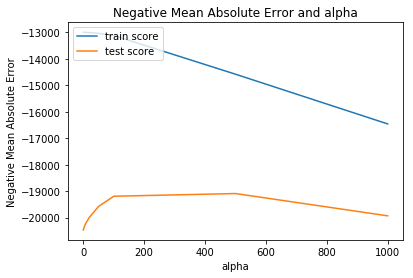

In [46]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [47]:
# from above diagram, it looks like value for alpha= 100 is decent enough
alpha =100

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=100, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [48]:
lasso.coef_

array([-2.81080342e+03,  5.75021760e+03,  1.13146048e+04,  6.94133081e+03,
        1.12917075e+04,  7.86717030e+02,  8.76946542e+03,  9.70117829e+02,
       -0.00000000e+00,  5.39306664e+03,  0.00000000e+00,  6.73959647e+02,
       -2.20185832e+03,  2.80194090e+04,  1.86412559e+03, -6.00108599e+02,
        4.19975868e+02, -6.42119350e+02, -2.28991313e+03, -3.23960211e+03,
        2.98595211e+03,  1.73371419e+03,  2.97135762e+03,  4.83052132e+03,
        8.87881137e+02,  1.33146626e+03, -7.56838287e+02,  7.81194441e+02,
        2.58382840e+03,  3.88297707e+03,  3.42866658e+02, -9.16812239e+02,
        1.83973088e+02,  1.73416205e+03, -1.24048908e+02,  1.47949447e+03,
        1.65189131e+03,  3.51785638e+03,  1.77286480e+03, -8.04433644e+02,
        2.30827017e+02,  3.21442918e+03, -0.00000000e+00,  2.68904411e+03,
        0.00000000e+00,  9.46267258e+02, -1.47066644e+03, -1.05867672e+03,
       -5.32502697e+02,  1.69957925e+03, -7.29173284e+02,  0.00000000e+00,
        5.62377603e+02,  

In [49]:
# lasso model parameters
model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 186472.617),
 ('MSSubClass', -2810.803),
 ('LotArea', 5750.218),
 ('OverallQual', 11314.605),
 ('OverallCond', 6941.331),
 ('YearBuilt', 11291.707),
 ('YearRemodAdd', 786.717),
 ('BsmtFinSF1', 8769.465),
 ('BsmtFinSF2', 970.118),
 ('BsmtUnfSF', -0.0),
 ('TotalBsmtSF', 5393.067),
 ('1stFlrSF', 0.0),
 ('2ndFlrSF', 673.96),
 ('LowQualFinSF', -2201.858),
 ('GrLivArea', 28019.409),
 ('BsmtFullBath', 1864.126),
 ('BsmtHalfBath', -600.109),
 ('FullBath', 419.976),
 ('HalfBath', -642.119),
 ('BedroomAbvGr', -2289.913),
 ('KitchenAbvGr', -3239.602),
 ('TotRmsAbvGrd', 2985.952),
 ('Fireplaces', 1733.714),
 ('GarageCars', 2971.358),
 ('GarageArea', 4830.521),
 ('WoodDeckSF', 887.881),
 ('OpenPorchSF', 1331.466),
 ('EnclosedPorch', -756.838),
 ('3SsnPorch', 781.194),
 ('ScreenPorch', 2583.828),
 ('PoolArea', 3882.977),
 ('MiscVal', 342.867),
 ('MoSold', -916.812),
 ('YrSold', 183.973),
 ('MSZoning_FV', 1734.162),
 ('MSZoning_RH', -124.049),
 ('MSZoning_RL', 1479.494),
 ('MSZoning_RM'

In [ ]:
# from above coefficients information we can conclude that -
#1- BsmtUnfSF,LandContour_Low,Neighborhood_ClearCr,Condition1_PosA,RoofMatl_Metal,PavedDrive_Y can be removed from features 
#    list
#2- SaleCondition_Partial,RoofMatl_Tar&Grv, OverallQual, YearBuilt are important features on which company should focus on.